### Import Libraries 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score

#formats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Dataset

In [2]:
df = pd.read_csv('/home/clivence/base_jupyter/Datadump/Master_data.csv')
df.head()

,open,high,low,close,25EMA,50EMA,100EMA,125EMA,Ticker,Interval,Month,Year,Date,Primary_Key,Trend Status,Spread,Action,Opportunity,Order Type,Alerts,Index_Special,Alerts_Index,ROI Since Alert,Lowest Low,Highest High,Low Spread,High Spread,1D Trade Status,Consecutive Count,Trend Counter
0,1.18855,1.18955,1.18845,1.18935,1.189350,1.189350,1.189350,1.189350,EUR/USD,4h,September,2020,2020-11-08 15:00:00,EUR/USD4h2020-11-08 15:00:00,Consolidating,0.000000,NaN,Suboptimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0,1.0
1,1.18925,1.18955,1.18805,1.18920,1.189338,1.189344,1.189347,1.189348,EUR/USD,4h,September,2020,2020-11-08 19:00:00,EUR/USD4h2020-11-08 19:00:00,Bearish,0.000006,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0,1.0
2,1.18915,1.18995,1.18800,1.18885,1.189301,1.189325,1.189337,1.189340,EUR/USD,4h,September,2020,2020-11-08 23:00:00,EUR/USD4h2020-11-08 23:00:00,Bearish,0.000024,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0,2.0
3,1.18845,1.19005,1.18605,1.18865,1.189251,1.189298,1.189324,1.189329,EUR/USD,4h,September,2020,2020-11-09 03:00:00,EUR/USD4h2020-11-09 03:00:00,Bearish,0.000047,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0,3.0
4,1.18860,1.19205,1.18145,1.18300,1.188770,1.189051,1.189198,1.189228,EUR/USD,4h,September,2020,2020-11-09 07:00:00,EUR/USD4h2020-11-09 07:00:00,Bearish,0.000281,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0,4.0


### Data Cleaning

In [3]:
#Subset for trades
df = df[df['Alerts'] ==1] 
df = df[df['Action'] == 'Ultimate Action']
df = df[df['Ticker'] == 'EUR/USD']


#Removed features
df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA', '125EMA',
        'Trend Status', 'Spread', 'Action', 'Opportunity', 'Order Type','Low Spread', 'High Spread', 'Trend Counter','1D Trade Status']]

#Apply one-hot encoding 
df= pd.get_dummies(df,columns=['Trend Status','Opportunity', 'Order Type'])

In [4]:
df.head()

,open,high,low,close,25EMA,50EMA,100EMA,125EMA,Spread,Action,Low Spread,High Spread,Trend Counter,1D Trade Status,Trend Status_Bearish,Trend Status_Bullish,Opportunity_Optimal,Opportunity_Unfavorable,Order Type_BUY,Order Type_SELL
31,1.18440,1.1849,1.18340,1.18445,1.182063,1.183700,1.185724,1.186293,0.001637,Ultimate Action,0.00300,0.00495,31.0,0,True,False,False,True,False,True
36,1.18355,1.1847,1.18350,1.18420,1.182777,1.183801,1.185586,1.186138,0.001024,Ultimate Action,0.00000,0.00520,36.0,0,True,False,False,True,False,True
141,1.20820,1.2085,1.20590,1.20720,1.210488,1.207215,1.201275,1.199344,0.003273,Ultimate Action,0.00005,0.00915,97.0,1,False,True,True,False,True,False
189,1.21765,1.2227,1.21305,1.21620,1.220249,1.217388,1.211675,1.209294,0.002861,Ultimate Action,0.00095,0.00950,145.0,1,False,True,True,False,True,False
196,1.22440,1.2257,1.21655,1.21735,1.221048,1.218565,1.213057,1.210668,0.002483,Ultimate Action,0.00210,0.00470,152.0,1,False,True,True,False,True,False


In [5]:
df.columns

Index(['open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA', '125EMA',
       'Spread', 'Action', 'Low Spread', 'High Spread', 'Trend Counter',
       '1D Trade Status', 'Trend Status_Bearish', 'Trend Status_Bullish',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL'],
      dtype='object')

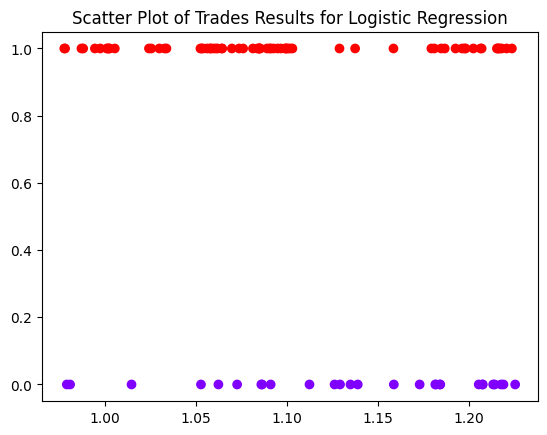

In [6]:
#Create a scatter plot of the target variable 
plt.scatter(x=df['close'],y=df['1D Trade Status'], c=df['1D Trade Status'], cmap='rainbow')
plt.title('Scatter Plot of Trades Results for Logistic Regression')
plt.show()

### Split Data: Training & Test Data

In [7]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA', '125EMA',
        'Spread','Low Spread', 'High Spread', 'Trend Counter','Trend Status_Bearish', 'Trend Status_Bullish',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['1D Trade Status'] 

In [8]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### Algoritm Selection 

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
Y_pred = model.predict(X_test)

### Evaluate Results 

In [11]:
accuracy = accuracy_score(Y_test,Y_pred)
classification_rep =classification_report(Y_test,Y_pred)

/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print(f"Accuracy:", accuracy)
print(f"\nClassfication Report:\n",classification_rep )

Accuracy: 0.7333333333333333

Classfication Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



In [13]:
# Displaying using confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[ 0,  8],
       [ 0, 22]])